<a href="https://colab.research.google.com/github/Juna78/Data-Science-II/blob/main/Pre%20entrega%20Data%20Science%20II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ANALISIS DE DATOS DE VENTAS

En este proyecto analizare un dataset (obtenido de www.kaggle.com) de transacciones de ventas para identificar patrones de compra, preferencias de productos y el peso del genero a la hora de la compra de los clientes apra asi dar informacion util en la optimizacion de estrategias comerciales.

Toda empresa busca maximizar sus ingresos y mejorar la experiencia del cliente, entendiendo los patrones de commpra. La idea de este analisis es ayudar al diseño y/u optimizar estrategias de venta.
Por esto, este proyecto esta orientado a gerentes de marketing y equipos comerciales.

Voy a usar analisis exploratorio de datos para responder a las siguientes hipotesis:

*  Que categorias de productos dan los mayores ingresos?
*  Existe diferencia de compras segun el genero?
*  Los clientes con mas antiguedad gastan mas por     compra?






In [139]:
#Importo librerias necesarias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [140]:
#Lectura del dataset desde github

url = 'https://raw.githubusercontent.com/Juna78/Data-Science-II/main/Ventas.csv'
df = pd.read_csv(url)


In [141]:
#Vista primeas filas del dataset

df.head()

,Unnamed: 0,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,...,Avg_Price,Delivery_Charges,Coupon_Status,GST,Date,Offline_Spend,Online_Spend,Month,Coupon_Code,Discount_pct
0,0,17850.0,M,Chicago,12.0,16679.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,...,153.71,6.5,Used,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
1,1,17850.0,M,Chicago,12.0,16680.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,...,153.71,6.5,Used,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
2,2,17850.0,M,Chicago,12.0,16696.0,2019-01-01,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest-USA,...,122.77,6.5,Not Used,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
3,3,17850.0,M,Chicago,12.0,16699.0,2019-01-01,GGOENEBQ079099,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,...,81.50,6.5,Clicked,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
4,4,17850.0,M,Chicago,12.0,16700.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,...,153.71,6.5,Clicked,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0


In [142]:
#Vista formato del dataset

df.shape

(52955, 21)

In [143]:
#Informacion general del dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52955 entries, 0 to 52954
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           52955 non-null  int64  
 1   CustomerID           52924 non-null  float64
 2   Gender               52924 non-null  object 
 3   Location             52924 non-null  object 
 4   Tenure_Months        52924 non-null  float64
 5   Transaction_ID       52924 non-null  float64
 6   Transaction_Date     52924 non-null  object 
 7   Product_SKU          52924 non-null  object 
 8   Product_Description  52924 non-null  object 
 9   Product_Category     52955 non-null  object 
 10  Quantity             52924 non-null  float64
 11  Avg_Price            52924 non-null  float64
 12  Delivery_Charges     52924 non-null  float64
 13  Coupon_Status        52924 non-null  object 
 14  GST                  52924 non-null  float64
 15  Date                 52924 non-null 

DESCRIPCION DE VARIABLES
* CustomerID: Identificador unico de clinete (numerica)
* Gender: Genero del cliente (M: masculinio, F: femenino)
* Location: Ubicacion del cliente (cateogirca)
* Tenure_Months: Antiguedad del cliente (Meses, numerica)
* Transaction_Date: Fecha transaccion (texto)
* Transaction_ID: Identificador unico transaccion (numerica)
* Product_SKU: codigo unico del producto (texto)
* Product_Description: Descripcion del producto (texto)
* Product_Category: Categoria del producto (categorica)
* Quantity: Cantidad producto comprado (numerica)
* Avg_Price: Precio promedio por unidad (numerica)
* Delivery_Charges: Costo de evnio
* Coupon_Status: Estado del cupon de descuento (categorica)
* GST: Impuesto (numerica)
* Date: Fecha compra (texto)
* Offline_Spend: Gasto tienda fisica (numerica)
* Online_Spend: Gasto tienda en linea (numerica)
* Month: Mes de la compra (numerica)
* Coupon_Code: Codigo cupon aplicado (texto)
* Discount_Pct: Porcentaje descuento (numerica)

In [144]:
#Transformo variable Date object a numerica

df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y', errors='coerce')

In [145]:
#Detallo los valores de tipo object

df.describe(include=['object']).T

,count,unique,top,freq
Gender,52924,2,F,33007
Location,52924,5,Chicago,18380
Transaction_Date,52924,365,2019-11-27,335
Product_SKU,52924,1145,GGOENEBJ079499,3511
Product_Description,52924,404,Nest Learning Thermostat 3rd Gen-USA - Stainle...,3511
Product_Category,52955,21,Apparel,18126
Coupon_Status,52924,3,Clicked,26926
Coupon_Code,52555,48,SALE20,6373


Luego de un analisis de variables, veo que Transaction_Date y Date son redundantes. Elijo eliminar la primera.

In [146]:
#Elimino columna Transaction_Date

df.drop(columns=['Transaction_Date'], inplace=True)
df.drop(columns=['Unnamed: 0'], inplace=True)

In [147]:
#Descripcion del dataset nuevo

df.describe().T

,count,mean,min,25%,50%,75%,max,std
CustomerID,52924.0,15346.70981,12346.0,13869.0,15311.0,16996.25,18283.0,1766.55602
Tenure_Months,52924.0,26.127995,2.0,15.0,27.0,37.0,50.0,13.478285
Transaction_ID,52924.0,32409.825675,16679.0,25384.0,32625.5,39126.25,48497.0,8648.668977
Quantity,52924.0,4.497638,1.0,1.0,1.0,2.0,900.0,20.104711
Avg_Price,52924.0,52.237646,0.39,5.7,16.99,102.13,355.74,64.006882
Delivery_Charges,52924.0,10.51763,0.0,6.0,6.0,6.5,521.36,19.475613
GST,52924.0,0.137462,0.05,0.1,0.18,0.18,0.18,0.045825
Date,52924,2019-07-05 19:16:09.450533120,2019-01-01 00:00:00,2019-04-12 00:00:00,2019-07-13 00:00:00,2019-09-27 00:00:00,2019-12-31 00:00:00,NaN
Offline_Spend,52924.0,2830.914141,500.0,2500.0,3000.0,3500.0,5000.0,936.154247
Online_Spend,52924.0,1893.109119,320.25,1252.63,1837.87,2425.35,4556.93,807.014092


In [148]:
#Cantidad de duplicados

df.duplicated().sum()

np.int64(0)

No hay valores duplicados

In [149]:
#Cantidad de valores nulos

df.isnull().sum()

,0
CustomerID,31
Gender,31
Location,31
Tenure_Months,31
Transaction_ID,31
Product_SKU,31
Product_Description,31
Product_Category,0
Quantity,31
Avg_Price,31


In [150]:
#Representacion de valores nulos por variable

nulos_por_variable = df.isnull()
cantidad_nulos_por_variable = nulos_por_variable.sum()
variables_con_nulos = cantidad_nulos_por_variable[cantidad_nulos_por_variable > 0]
lista_variables_con_nulos = variables_con_nulos.index.tolist()

for variable in lista_variables_con_nulos:
    cantidad_nulos = cantidad_nulos_por_variable[variable]
    porcentaje_nulos = (cantidad_nulos / len(df)) * 100
    print(f"Variable: {variable}, Cantidad de Nulos: {cantidad_nulos}, Porcentaje de Nulos: {porcentaje_nulos:.2f}%")

Variable: CustomerID, Cantidad de Nulos: 31, Porcentaje de Nulos: 0.06%
Variable: Gender, Cantidad de Nulos: 31, Porcentaje de Nulos: 0.06%
Variable: Location, Cantidad de Nulos: 31, Porcentaje de Nulos: 0.06%
Variable: Tenure_Months, Cantidad de Nulos: 31, Porcentaje de Nulos: 0.06%
Variable: Transaction_ID, Cantidad de Nulos: 31, Porcentaje de Nulos: 0.06%
Variable: Product_SKU, Cantidad de Nulos: 31, Porcentaje de Nulos: 0.06%
Variable: Product_Description, Cantidad de Nulos: 31, Porcentaje de Nulos: 0.06%
Variable: Quantity, Cantidad de Nulos: 31, Porcentaje de Nulos: 0.06%
Variable: Avg_Price, Cantidad de Nulos: 31, Porcentaje de Nulos: 0.06%
Variable: Delivery_Charges, Cantidad de Nulos: 31, Porcentaje de Nulos: 0.06%
Variable: Coupon_Status, Cantidad de Nulos: 31, Porcentaje de Nulos: 0.06%
Variable: GST, Cantidad de Nulos: 31, Porcentaje de Nulos: 0.06%
Variable: Date, Cantidad de Nulos: 31, Porcentaje de Nulos: 0.06%
Variable: Offline_Spend, Cantidad de Nulos: 31, Porcentaje d

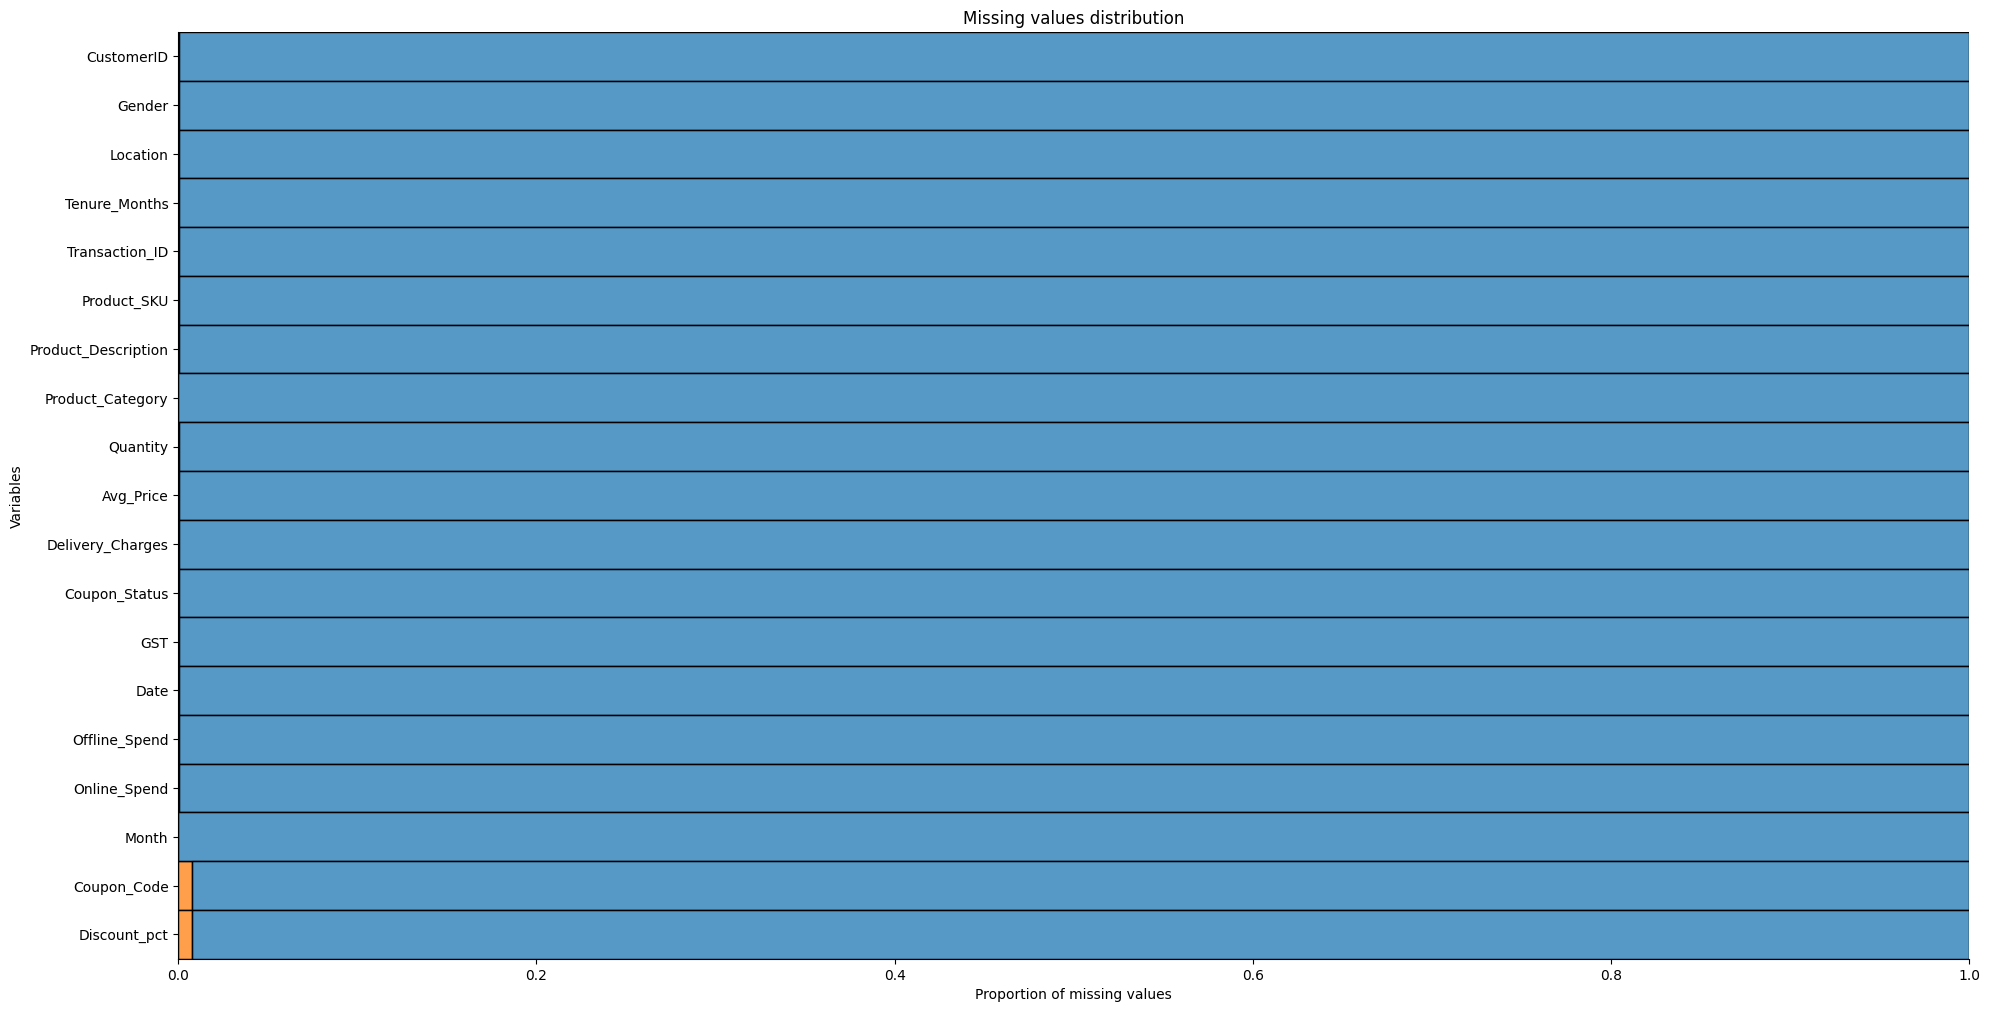

In [151]:
#Visualizacion grafica de variables y valores nulos

(data_graf := df.isnull().melt()).pipe(
    lambda data: (
        sns.displot(
            data=data,
            y="variable",
            hue="value",
            multiple="fill",
            height=10,
            aspect=2,
            legend=False
        )
    )
)

plt.title('Missing values distribution')
plt.xlabel('Proportion of missing values')
plt.ylabel('Variables')
plt.show()

Tanto de manera analitica como grafica, se puede ver que el porcentaje de valores nulos no es significativo. No es necesario tratemiento de valores para este dataset.

Luego de analizar las categorias procedo a la combinacion de las categorias Nest-USA y Nest-Canada en Nest, para asi evitar sesgos en la informacion

In [152]:
#Combino las categorias Nest

df['Product_Category'] = df['Product_Category'].replace('Nest-USA', 'Nest')
df['Product_Category'] = df['Product_Category'].replace('Nest-Canada', 'Nest')

ANALISIS EXPLORATORIO DE DATOS

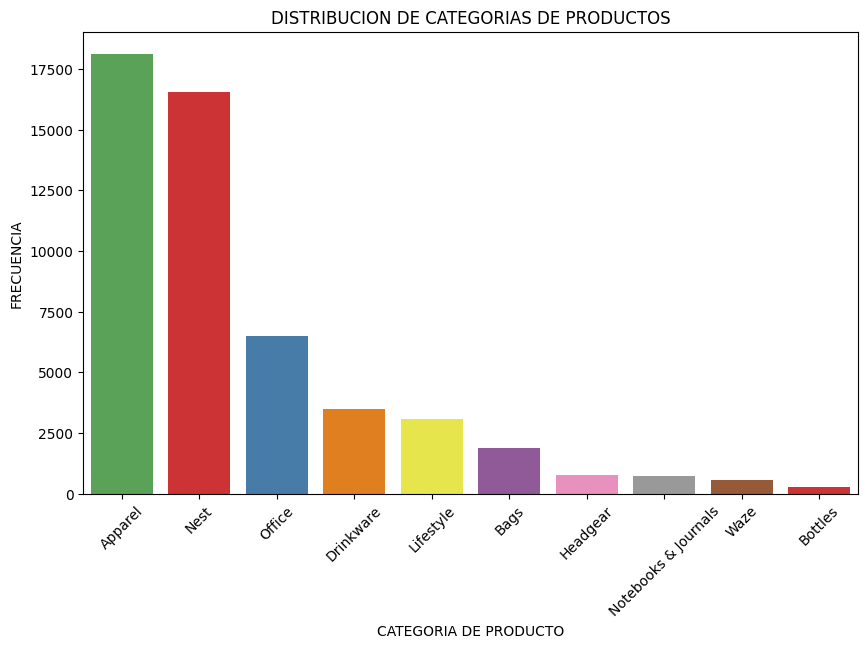

In [153]:
#Analisis univariado
#Obtengo las 10 primeras categorias segun la cantidad de ventas

top_categorias = df['Product_Category'].value_counts().nlargest(10).index

#grafico distribucion productos por cantidad de ventas
plt.figure(figsize=(10, 6))
sns.countplot(data=df[df['Product_Category'].isin(top_categorias)],
              x='Product_Category',
              order=top_categorias,
              palette='Set1',
              hue='Product_Category',
              legend=False,
              width=0.8)
plt.title('DISTRIBUCION DE CATEGORIAS DE PRODUCTOS')
plt.xlabel('CATEGORIA DE PRODUCTO')
plt.ylabel('FRECUENCIA')
plt.xticks(rotation=45)
plt.show()

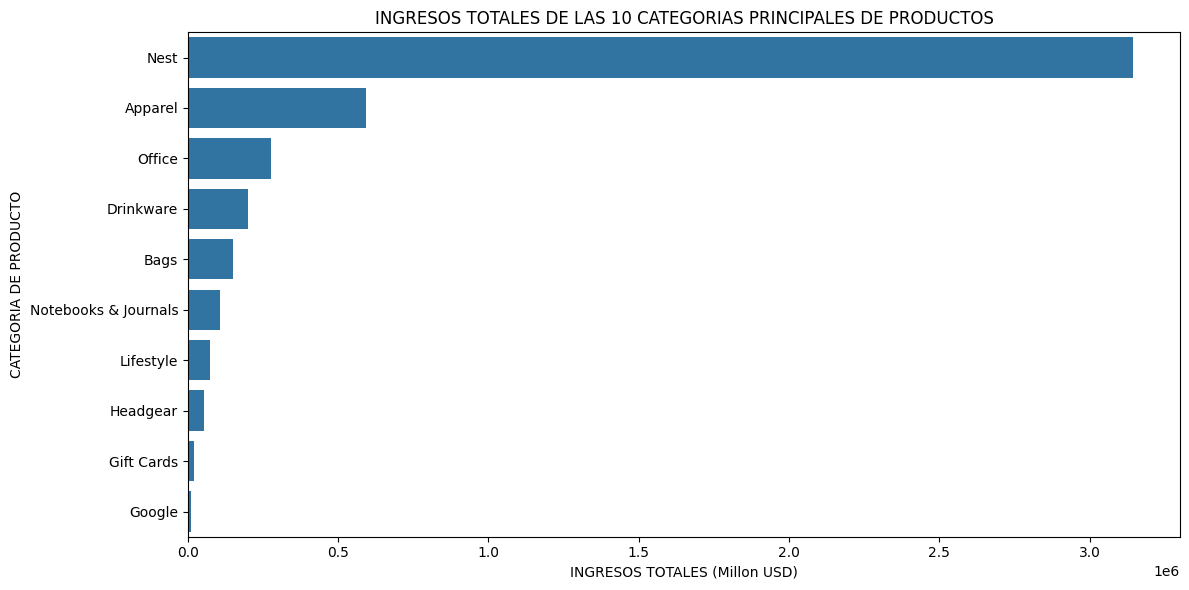

Ingresos totales por categoría (Top 10):
        Product_Category  Ingreso_Total
14                  Nest     3143306.29
2                Apparel      591145.80
17                Office      276794.40
6              Drinkware      200707.83
4                   Bags      151314.43
16  Notebooks & Journals      107085.96
12             Lifestyle       74385.70
10              Headgear       53471.44
8             Gift Cards       19533.82
9                 Google        9420.47


In [154]:
#Calculo ingreso total

df['Ingreso_Total'] = df['Quantity'] * df['Avg_Price']


#Agrupo por Product_Category y suma de ingreso total
category_revenue = df.groupby('Product_Category')['Ingreso_Total'].sum().reset_index()


#Ordeno por ingresos y muestro las 10 categorias principales
category_revenue = category_revenue.sort_values(by='Ingreso_Total', ascending=False).head(10)

#Grafico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x='Ingreso_Total', y='Product_Category', data=category_revenue, order=category_revenue['Product_Category'])
plt.title('INGRESOS TOTALES DE LAS 10 CATEGORIAS PRINCIPALES DE PRODUCTOS')
plt.xlabel('INGRESOS TOTALES (Millon USD)')
plt.ylabel('CATEGORIA DE PRODUCTO')
plt.tight_layout()
plt.show()

#Datos del grafico
print("Ingresos totales por categoría (Top 10):")
print(category_revenue)

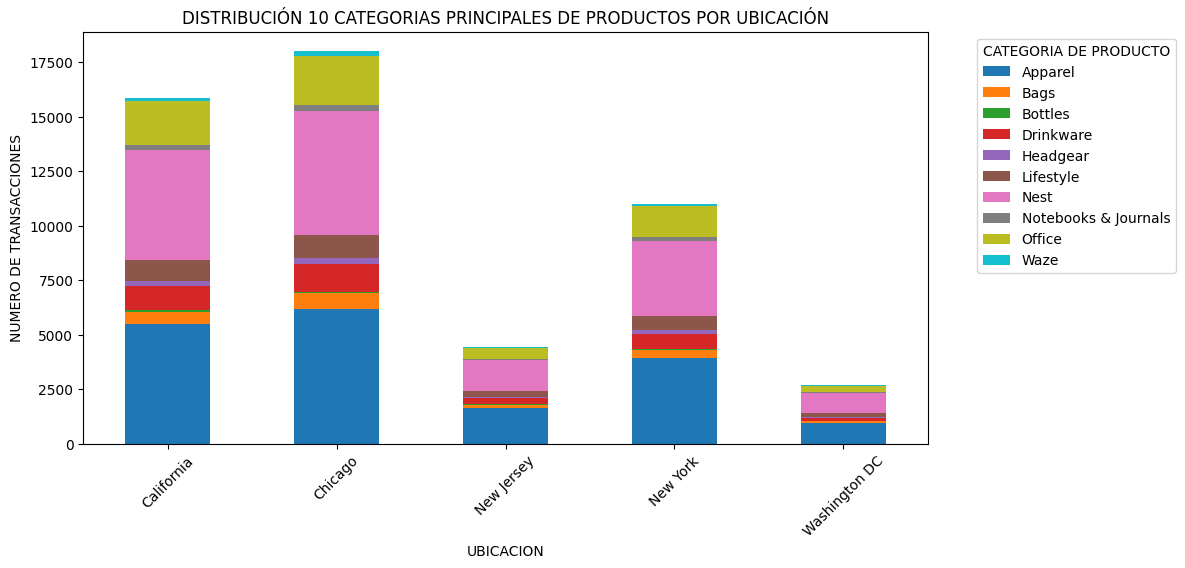

In [155]:
#Analisis bivariado
#Filtro dataset para incluir las 10 categoriaas mas frecuentes

top_10 = df[df['Product_Category'].isin(top_categorias)]

#Creo tabla cruzada
category_location = pd.crosstab(top_10['Location'], top_10['Product_Category'])

#Grafico barras apiladas
category_location.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('DISTRIBUCIÓN 10 CATEGORIAS PRINCIPALES DE PRODUCTOS POR UBICACIÓN')
plt.xlabel('UBICACION')
plt.ylabel('NUMERO DE TRANSACCIONES')
plt.legend(title='CATEGORIA DE PRODUCTO', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

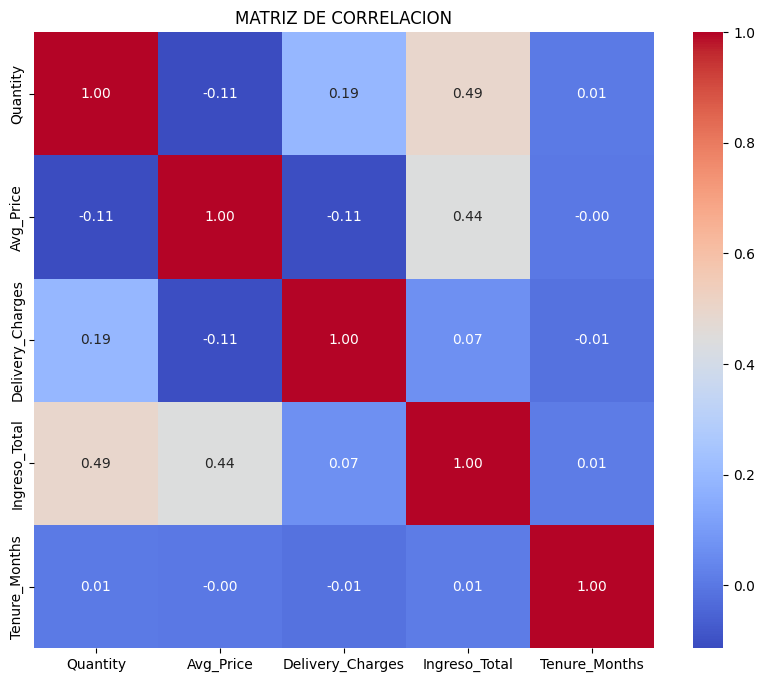

In [156]:
#Analisis bivariado
#Veo matriz de correlacion

plt.figure(figsize=(10, 8))
sns.heatmap(df[['Quantity', 'Avg_Price', 'Delivery_Charges', 'Ingreso_Total', 'Tenure_Months']].corr(),
            annot=True, cmap='coolwarm', fmt='.2f')
plt.title('MATRIZ DE CORRELACION')
plt.show()

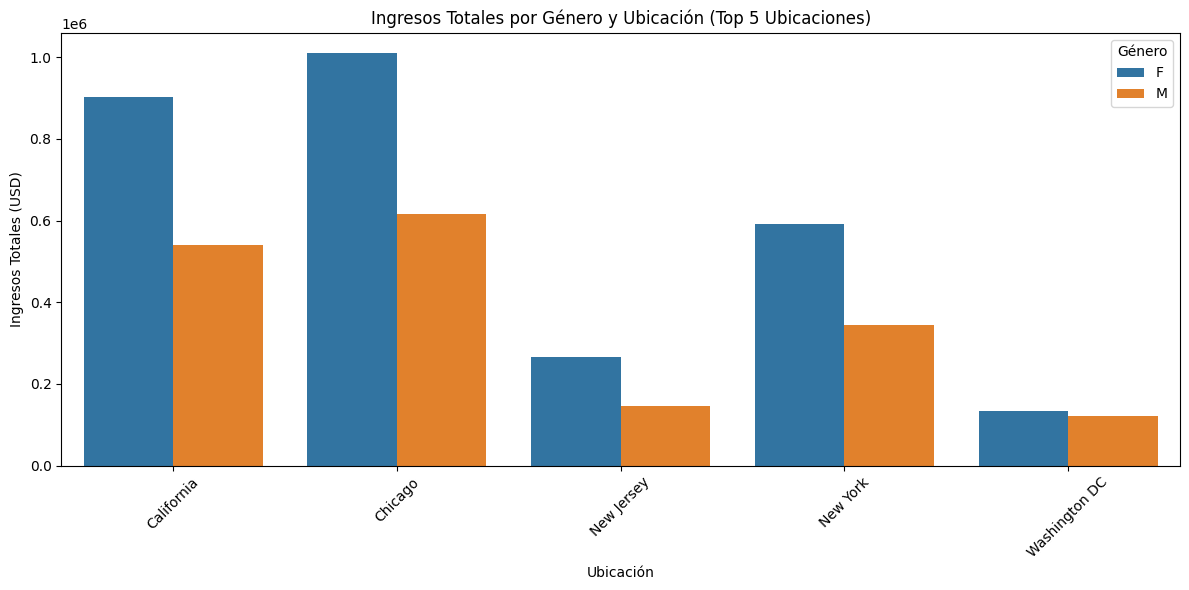

Ingresos totales por género y ubicación (Top 5 ubicaciones):
  Gender       Location  Ingreso_Total
0      F     California      902765.90
1      F        Chicago     1009337.31
2      F     New Jersey      264850.03
3      F       New York      592512.79
4      F  Washington DC      134204.20
5      M     California      539681.41
6      M        Chicago      616548.27
7      M     New Jersey      144816.83
8      M       New York      344509.84
9      M  Washington DC      121568.04


In [157]:
#Analisis bivariado
#Agrupo por Gender y Location.
#Sumo Ingreso_Total

ingreso_por_genero_ubicacion = df.groupby(['Gender', 'Location'])['Ingreso_Total'].sum().reset_index()

#5 ubicaciones más frecuentes
top_locations = df['Location'].value_counts().head(5).index
ingreso_por_genero_ubicacion = ingreso_por_genero_ubicacion[ingreso_por_genero_ubicacion['Location'].isin(top_locations)]

#Grafico de barras agrupadas
plt.figure(figsize=(12, 6))
sns.barplot(x='Location', y='Ingreso_Total', hue='Gender', data=ingreso_por_genero_ubicacion)
plt.title('Ingresos Totales por Género y Ubicación (Top 5 Ubicaciones)')
plt.xlabel('Ubicación')
plt.ylabel('Ingresos Totales (USD)')
plt.legend(title='Género')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Datos agrupados
print("Ingresos totales por género y ubicación (Top 5 ubicaciones):")
print(ingreso_por_genero_ubicacion)

Precio promedio de los 5 productos más vendidos (por categoría):
   Product_Category  Quantity   Avg_Price
17           Office   88383.0    3.770012
2           Apparel   32438.0   19.788995
6         Drinkware   30501.0   10.696893
12        Lifestyle   24881.0    3.860078
14             Nest   24736.0  134.257396


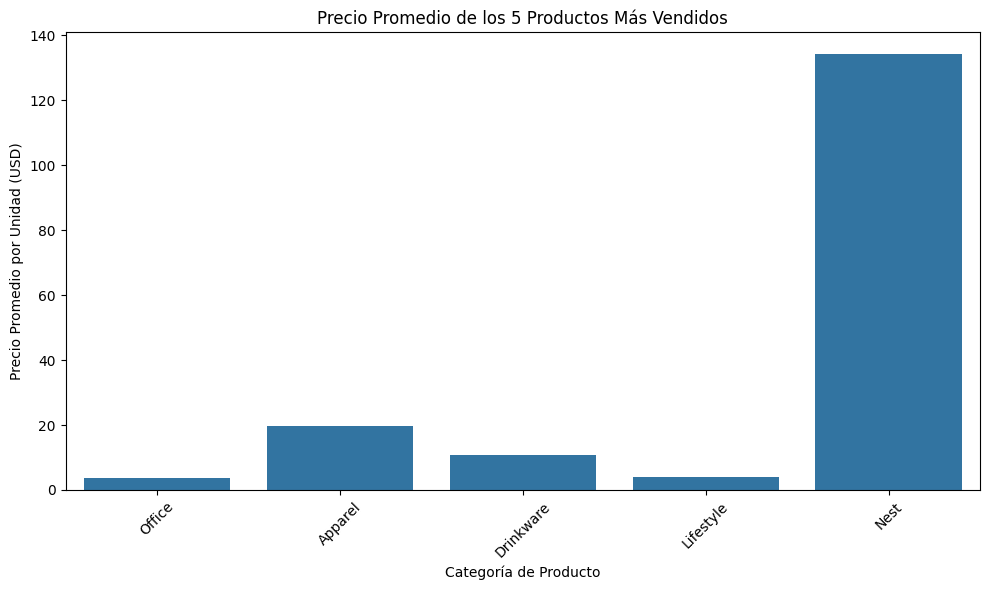

Resultados guardados como 'top_5_products_avg_price.csv'


In [158]:
#Analisis multivariado (dos metricas pero contra solo una variable categorica)
#Agrupo por Product_Category para sumar Quantity y calcular promedio de Avg_Price

productos_estadisticas = df.groupby('Product_Category').agg({
    #Unidades vendidas totales
    'Quantity': 'sum',
    #Precio promedio por unidad
    'Avg_Price': 'mean'
}).reset_index()

#Ordeno por Quantity
#Selecciono 5 productos mas vendidos
top_5_products = productos_estadisticas.sort_values(by='Quantity', ascending=False).head(5)

#Tabla con resultados
print("Precio promedio de los 5 productos más vendidos (por categoría):")
print(top_5_products[['Product_Category', 'Quantity', 'Avg_Price']])

#Grafico de barras precio promedio
plt.figure(figsize=(10, 6))
sns.barplot(x='Product_Category', y='Avg_Price', data=top_5_products)
plt.title('Precio Promedio de los 5 Productos Más Vendidos')
plt.xlabel('Categoría de Producto')
plt.ylabel('Precio Promedio por Unidad (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Guardo los resultados en dataset
top_5_products.to_csv('top_5_products_avg_price.csv', index=False)
print("Resultados guardados como 'top_5_products_avg_price.csv'")

In [160]:
#Importo libreria plotly para grafica 3D
import plotly.express as px

#Grafico de Barras Agrupadas (Ingresos por Categoria, Genero y Ubicacion)
#Selecciono 5 categorias y ubicaciones mas frecuentes
top_categories = df['Product_Category'].value_counts().head(5).index
top_locations = df['Location'].value_counts().head(5).index
df_filtered = df[df['Product_Category'].isin(top_categories) & df['Location'].isin(top_locations)]

#Agrupo por Product_Category, Gender y Location
category_gender_location = df_filtered.groupby(['Product_Category', 'Gender', 'Location'])['Ingreso_Total'].sum().reset_index()

#Grafico de barras agrupadas con Plotly
fig1 = px.bar(
    category_gender_location,
    x='Product_Category',
    y='Ingreso_Total',
    color='Gender',
    facet_col='Location',
    title='Ingresos Totales por Categoría, Género y Ubicación (Top 5)',
    labels={'Ingreso_Total': 'Ingresos Totales (USD)', 'Product_Category': 'Categoría de Producto', 'Gender': 'Género'}
)
fig1.update_layout(xaxis_title='Categoría de Producto', yaxis_title='Ingresos Totales (USD)')
fig1.show()

#Agrupo por CustomerID para sacar promedio por cliente
clientes_estadisticas = df.groupby(['CustomerID', 'Tenure_Months', 'Gender']).agg({
    'Ingreso_Total': 'mean',
    'Quantity': 'sum'
}).reset_index()

#Grafico de dispersion 3D
fig2 = px.scatter_3d(
    clientes_estadisticas,
    x='Tenure_Months',
    y='Ingreso_Total',
    z='Quantity',
    color='Gender',
    title='Antigüedad, Ingresos Promedio y Cantidad por Género',
    labels={
        'Tenure_Months': 'Antigüedad (Meses)',
        'Ingreso_Total': 'Ingresos Promedio por Transacción (USD)',
        'Quantity': 'Cantidad Total',
        'Gender': 'Género'
    },
    size_max=10
)
fig2.show()



CONCLUSION PARCIAL

Los productos "Nest" y "Gift Cards" son los mas rentables y vendidos, mas en ubicaciones que podrian ser clave como California y Nueva York. La antiguedad de los clientes no pareciera influir significativamente en el gasto. Se puede observar que es el genero femenino el que realiza mayores gastos.

Para mejorar las ventas y aumentar los ingresos se debera enfocar en promociones atractivas para mujeres, tanto en las categorias "Nest" como en "Gift Cards".
Teniendo en cuenta el factor genero y que la segunda categoria en cuanto a valor de venta es "Apparel" (vestimenta), se podrian crear campañas para aprovechar el interes natural a la compra de la misma.